# Imports

In [120]:
import numpy
import pandas
import matplotlib.pyplot as plt
from scipy import stats

# Data Sources

- World Happiness report 2021
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?resource=download

- World Happiness report 2021 Data Sources and Variable Definitions
https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf

- Income and Wealth inequality, All countries, Pre-tax national income of the top 1% and net personal wealth of top 1%
https://wid.world/data/


In [121]:
whd = pandas.read_csv('world-happiness-report-2021.csv')
wid = pandas.read_csv('WID_Data_Metadata/WID_Data_13072023-085241.csv',delimiter=';')

In [122]:
wid

,Country,Variable,Indicator,Year,Value
0,Afghanistan,sptinc_p99p100_z_AF\nPre-tax national income \...,p99p100,2021,0.1622
1,Afghanistan,shweal_p99p100_z_AF\nNet personal wealth\nTop ...,p99p100,2021,0.2477
2,Africa,sptinc_p99p100_z_QB\nPre-tax national income \...,p99p100,2021,0.1945
3,Africa,shweal_p99p100_z_QB\nNet personal wealth\nTop ...,p99p100,2021,0.3614
4,Africa (at market exchange rate),sptinc_p99p100_z_QB-MER\nPre-tax national inco...,p99p100,2021,0.3793
...,...,...,...,...,...
483,Yemen,shweal_p99p100_z_YE\nNet personal wealth\nTop ...,p99p100,2021,0.2962
484,Zambia,sptinc_p99p100_z_ZM\nPre-tax national income \...,p99p100,2021,0.2317
485,Zambia,shweal_p99p100_z_ZM\nNet personal wealth\nTop ...,p99p100,2021,0.4681
486,Zimbabwe,sptinc_p99p100_z_ZW\nPre-tax national income \...,p99p100,2021,0.2108


In [123]:
countries = wid['Country'].unique()
widFormatted = pandas.DataFrame()
widFormatted['Country'] = countries
widFormatted['1% Wealth Share'] = wid[wid['Variable'].str.contains('Net personal wealth')]['Value'].reset_index(drop=True)
widFormatted['1% Income Share'] = wid[wid['Variable'].str.contains('Pre-tax national income')]['Value'].reset_index(drop=True)
widFormatted


,Country,1% Wealth Share,1% Income Share
0,Afghanistan,0.2477,0.1622
1,Africa,0.3614,0.1945
2,Africa (at market exchange rate),0.4520,0.3793
3,Albania,0.2267,0.0924
4,Algeria,0.2506,0.0991
...,...,...,...
238,World,0.2521,0.1170
239,World (at market exchange rate),0.3960,0.1954
240,Yemen,0.4447,0.2316
241,Zambia,0.2962,0.2420


In [124]:
whd

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [125]:
worldData = pandas.merge(whd,widFormatted,'inner',left_on='Country name',right_on='Country').drop('Country', axis=1)
worldData

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,1% Wealth Share,1% Income Share
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.1855,0.1181
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.2164,0.1341
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.2765,0.1170
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.2382,0.0932
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.1644,0.0688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,0.3036,0.1446
134,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,0.4559,0.2274
135,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,0.3959,0.1989
136,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,0.4681,0.2317


# Getting to know the data

In [126]:
worldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                138 non-null    object 
 1   Regional indicator                          138 non-null    object 
 2   Ladder score                                138 non-null    float64
 3   Standard error of ladder score              138 non-null    float64
 4   upperwhisker                                138 non-null    float64
 5   lowerwhisker                                138 non-null    float64
 6   Logged GDP per capita                       138 non-null    float64
 7   Social support                              138 non-null    float64
 8   Healthy life expectancy                     138 non-null    float64
 9   Freedom to make life choices                138 non-null    float64
 10  Generosity    

In [127]:
worldData.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,1% Wealth Share,1% Income Share
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.00,138.000000,138.000000,138.000000,138.00000,138.000000,138.000000,138.000000,135.000000,138.000000
mean,5.528384,0.059174,5.644348,5.412377,9.405913,0.815486,64.921877,0.793377,-0.014101,0.728667,2.43,0.967971,0.794957,0.517920,0.50087,0.178717,0.134384,2.433587,0.294901,0.156316
std,1.101028,0.022198,1.080989,1.122384,1.159847,0.116422,6.681609,0.114813,0.154527,0.183251,0.00,0.405171,0.262346,0.210487,0.13969,0.100795,0.116927,0.527161,0.077855,0.052434
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.648000,0.149700,0.068800
25%,4.831000,0.044250,4.971750,4.680750,8.538750,0.750000,59.842000,0.724500,-0.132500,0.668500,2.43,0.665250,0.647500,0.358250,0.41725,0.101500,0.058000,2.140500,0.242700,0.116550
50%,5.563000,0.055000,5.685500,5.457500,9.563000,0.832000,66.602000,0.810500,-0.035000,0.788000,2.43,1.023000,0.832500,0.571000,0.52150,0.165000,0.096500,2.517000,0.278300,0.151500
75%,6.295500,0.070000,6.394250,6.157250,10.366250,0.907500,69.568500,0.878500,0.080500,0.848000,2.43,1.303250,1.001750,0.664250,0.60525,0.240500,0.173000,2.791500,0.321850,0.193200
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.71600,0.541000,0.547000,3.482000,0.543300,0.356100


In [128]:
worldData.duplicated().sum()

0

In [129]:
worldData.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
1% Wealth Share                         

# Data Cleaning

In [130]:
worldData.loc[worldData['1% Wealth Share'].isna()]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,1% Wealth Share,1% Income Share
30,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,...,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182,NaN,0.0913
70,Belarus,Commonwealth of Independent States,5.534,0.047,5.625,5.442,9.853,0.910,66.253,0.650,...,2.43,1.124,1.007,0.560,0.326,0.070,0.199,2.247,NaN,0.0866
108,Uganda,Sub-Saharan Africa,4.636,0.073,4.780,4.493,7.677,0.781,56.101,0.709,...,2.43,0.364,0.718,0.240,0.398,0.267,0.054,2.596,NaN,0.1903


In [131]:
widFormatted.loc[widFormatted['1% Wealth Share'].isna()]

,Country,1% Wealth Share,1% Income Share
18,Belarus,NaN,0.0866
101,Kosovo,NaN,0.0913
224,Uganda,NaN,0.1903
231,Viet Nam,NaN,0.1895


In [132]:
worldData.dropna(inplace=True)
worldData.reset_index(drop=True,inplace=True)

# Data Analysis

In [133]:
def removeOutliers(X,y):
    XOutliers = X[numpy.abs(stats.zscore(X)) >= 3]
    yOutliers = y[numpy.abs(stats.zscore(y)) >= 3]
    XCleaned = X[numpy.abs(stats.zscore(X)) < 3]
    yCleaned = y[numpy.abs(stats.zscore(y)) < 3]
    
    union = XOutliers.index.union(yOutliers.index)
    XOutliers = X.filter(items=union,axis=0)
    yOutliers = y.filter(items=union,axis=0)

    intersection = XCleaned.index.intersection(yCleaned.index)
    XCleaned = X.filter(items=intersection,axis=0)
    yCleaned = y.filter(items=intersection,axis=0)

    return XOutliers, yOutliers, XCleaned, yCleaned



## Ladder score against inequality
- As the top 1% of Wealth share increases, the ladder score decreases by a small amount
- As the top 1% of Income share increases, the ladder score decreases by a small amount

### Ladder score against top 1% Wealth

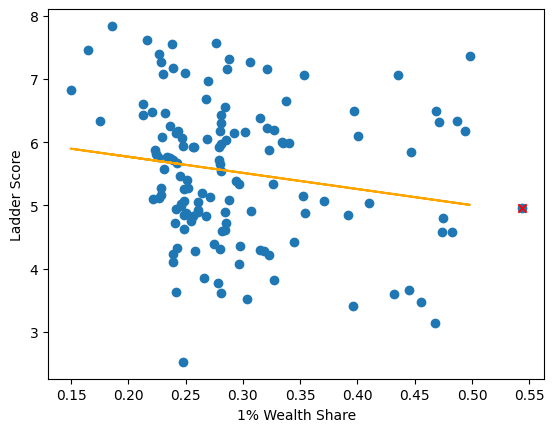

In [134]:
X = worldData['1% Wealth Share']
y = worldData['Ladder score']
result = removeOutliers(X,y)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(result[2],result[3])
correlation = intercept + slope*result[2]
plt.scatter(X,y)
plt.scatter(result[0],result[1],color='red',marker='x')
plt.plot(result[2],correlation,color='orange')
plt.xlabel('1% Wealth Share')
plt.ylabel('Ladder Score')
plt.show()

### Ladder score against top 1% Income

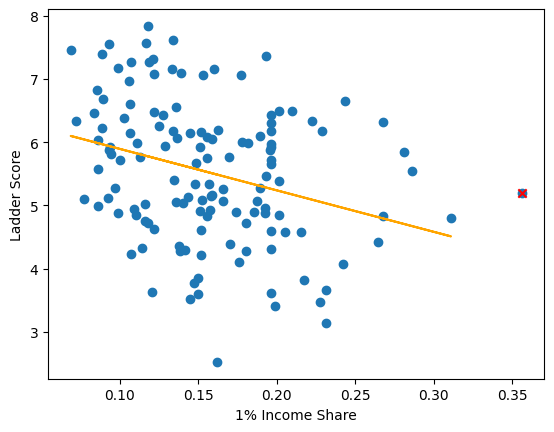

In [136]:
X = worldData['1% Income Share']
result = removeOutliers(X,y)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(result[2],result[3])
correlation = intercept + slope*result[2]
plt.scatter(X,y)
plt.scatter(result[0],result[1],color='red',marker='x')
plt.plot(result[2],correlation,color='orange')
plt.xlabel('1% Income Share')
plt.ylabel('Ladder Score')
plt.show()